NLP Practical 3

In [73]:
import numpy as np
import os
from random import shuffle
import re
import sklearn as sk
import matplotlib.pyplot as plt
import random

In [74]:
import urllib.request
import zipfile
import lxml.etree

In [75]:
import tensorflow as tf

In [76]:
with zipfile.ZipFile('ted_en-20160408.zip', 'r') as z:
    doc = lxml.etree.parse(z.open('ted_en-20160408.xml', 'r'))
    
raw_text = doc.xpath('//content/text()')
raw_label = doc.xpath('//head/keywords/text()')

del doc

In [77]:
talk_sentences = []
talknum = len(input_text)

for i in range(talknum):
    temp = re.sub(r'\([^)]*\)', '', input_text[i])
    temp = re.sub(r'\n', '', input_text[i])
    temp = temp.split('.')
    talk_sentences.append(temp)

In [78]:
print(talk_sentences[0][1])

To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation


In [79]:
talk_sentence_word = []

for talk in talk_sentences:
    temp = []
    for sent in talk:
        tokens = re.sub(r"[^a-z0-9]+", " ", sent.lower()).split()
        temp.append(tokens)#
    talk_sentence_word.append(temp)

In [80]:
talk_sentence_word[0][1]

['to',
 'me',
 'the',
 'real',
 'real',
 'solution',
 'to',
 'quality',
 'growth',
 'is',
 'figuring',
 'out',
 'the',
 'balance',
 'between',
 'two',
 'activities',
 'exploration',
 'and',
 'exploitation']

In [81]:
freq = {}

for talk in talk_sentence_word:
    for sent in talk:
        for word in sent:
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1

In [82]:
from collections import Counter

counts_ted_top1000 = []
words_top_ted = []

for word, count in Counter(freq).most_common(1000):
    counts_ted_top1000.append(count)
    words_top_ted.append(word)

In [83]:
talk_sentence_word_nostop = talk_sentence_word

for stop in words_top_ted[:200]:
    for talk in talk_sentence_word_nostop:
        for sent in talk:
            for word in sent:
                if word == stop:
                    sent.remove(word)

In [84]:
talk_sentence_word_nostop[0][1]

['real',
 'real',
 'solution',
 'quality',
 'growth',
 'figuring',
 'balance',
 'between',
 'activities',
 'exploration',
 'exploitation']

In [85]:
np.shape(talk_sentence_word_nostop)

(2085,)

In [86]:
input_label = []

for i in range(len(raw_label)):
    temp = re.sub(r' ', '', raw_label[i])
    input_label.append(temp.split(','))
    
#print(input_label_prepro)

In [87]:
labels_binary = []

for i in range(len(input_label)):
    temp = np.zeros(3)
    if 'technology' in '~'.join(input_label[i]):
        temp[0] = 1
    if 'entertainment' in '~'.join(input_label[i]):
        temp[1] = 1
    if 'design' in '~'.join(input_label[i]):
        temp[2] = 1
    labels_binary.append(temp)
        
print(input_label[9])
print(labels_binary[:10])

['talks', 'Senses', 'augmentedreality', 'brain', 'computers', 'creativity', 'cyborg', 'demo', 'design', 'engineering', 'entrepreneur', 'innovation', 'interfacedesign', 'invention', 'neuroscience', 'potential', 'prediction', 'productdesign', 'technology', 'visualizations']
[array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  1.]), array([ 1.,  0.,  1.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.]), array([ 1.,  0.,  1.])]


In [139]:
temp = list(zip(talk_sentence_word_nostop, labels_binary))
random.shuffle(temp)
talk_sentence_word_nostop_shuffle, labels_binary_shuffle = zip(*temp)

In [140]:
labels_onehot = []
for i in range(len(input_label)):
    temp = np.zeros(8)
    temp[labels_binary[i][0]*4+labels_binary[i][1]*2+labels_binary[i][2]*1] = 1
    labels_onehot.append(temp)

In [141]:
labels_onehot_shuffle = []
for i in range(len(input_label)):
    temp = np.zeros(8)
    temp[labels_binary_shuffle[i][0]*4+labels_binary_shuffle[i][1]*2+labels_binary_shuffle[i][2]*1] = 1
    labels_onehot_shuffle.append(temp)

In [142]:
train_data = talk_sentence_word_nostop[:1835]
test_data = talk_sentence_word_nostop[1835:]

train_labels = labels_binary[:1835]
test_labels = labels_binary[1835:]

train_labels_onehot = labels_onehot[:1835]
test_labels_onehot = labels_onehot[1835:]

In [143]:
train_data_shuffle = talk_sentence_word_nostop_shuffle[:1835]
test_data_shuffle = talk_sentence_word_nostop_shuffle[1835:]

train_labels_shuffle = labels_binary_shuffle[:1835]
test_labels_shuffle = labels_binary_shuffle[1835:]

train_labels_onehot_shuffle = labels_onehot_shuffle[:1835]
test_labels_onehot_shuffle = labels_onehot_shuffle[1835:]

In [144]:
print(np.shape(talk_sentences_token))
print(np.shape(labels))
print(np.shape(labels_onehot))
print(np.shape(train_data))
print(np.shape(train_labels))
print(np.shape(train_labels_onehot))
print(np.shape(test_data))
print(np.shape(test_labels))
print(np.shape(test_labels_onehot))

(2085,)
(2085, 3)
(2085, 8)
(1835,)
(1835, 3)
(1835, 8)
(250,)
(250, 3)
(250, 8)


In [145]:
print(np.shape(talk_sentences_token_shuffle))
print(np.shape(labels_shuffle))
print(np.shape(labels_onehot_shuffle))
print(np.shape(train_data_shuffle))
print(np.shape(train_labels_shuffle))
print(np.shape(train_labels_onehot_shuffle))
print(np.shape(test_data_shuffle))
print(np.shape(test_labels_shuffle))
print(np.shape(test_labels_onehot_shuffle))

(2085,)
(2085, 3)
(2085, 8)
(1835,)
(1835, 3)
(1835, 8)
(250,)
(250, 3)
(250, 8)


In [146]:
check = np.asarray(train_labels_onehot)
print(check.sum(0) / check.sum())
check = np.asarray(test_labels_onehot)
print(check.sum(0) / check.sum())

[ 0.57493188  0.0746594   0.0719346   0.00980926  0.17711172  0.06376022
  0.01525886  0.01253406]
[ 0.292  0.108  0.164  0.024  0.224  0.112  0.032  0.044]


In [147]:
check = np.asarray(train_labels_onehot_shuffle)
print(check.sum(0) / check.sum())
check = np.asarray(test_labels_onehot_shuffle)
print(check.sum(0) / check.sum())

[ 0.53950954  0.08010899  0.08719346  0.0119891   0.18310627  0.0653951
  0.01689373  0.01580381]
[ 0.552  0.068  0.052  0.008  0.18   0.1    0.02   0.02 ]


In [151]:
train_lenghts = []

for talk in train_data:
    N = 0
    for sent in talk:
        for word in sent:
            N += 1
    train_lenghts.append(N)

In [156]:
train_lenghts[:10]

[475, 807, 852, 493, 971, 823, 676, 692, 977, 622]

In [153]:
test_lenghts = []

for talk in test_data:
    N = 0
    for sent in talk:
        for word in sent:
            N += 1
    test_lenghts.append(N)

In [154]:
test_lenghts[:10]

[208, 1014, 826, 203, 1718, 241, 100, 979, 944, 1273]

In [170]:
train_talk_sent = []

for talk in train_data:
    temp = []
    for sent in talk:
        for word in sent:
            temp.append(word)
    train_talk_sent.append(temp)
    
print(len(train_talk_sent[0]))

475


In [171]:
test_talk_sent = []

for talk in test_data:
    temp = []
    for sent in talk:
        for word in sent:
            temp.append(word)
    test_talk_sent.append(temp)
    
print(len(test_talk_sent[0]))

208


In [100]:
from gensim.models import Word2Vec

In [101]:
model_ted = Word2Vec(train_sent, min_count=1, size=100)

In [178]:
bs = 10

lstm = tf.nn.rnn_cell.BasicLSTMCell(20)

state = tf.zeros([bs, lstm.state_size])
probabilities = []
loss = 0.0

for talk in train_talk_sent:
    output, state = lstm(talk, state)
    
    logits = tf.matmul(output, softmax_w) + softmax_b
    probabilities.append(tf.nn.softmax(logits))
    loss += loss_function(probabilities, target_words)


AttributeError: 'list' object has no attribute 'get_shape'

In [106]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [107]:
node_count = 20

x = tf.placeholder(tf.float32, shape=[None, 100])
y_ = tf.placeholder(tf.float32, shape=[None, 8])

# Define the first layer here
W = weight_variable([100, node_count])
b = bias_variable([node_count])
h = tf.nn.tanh(tf.matmul(x, W) + b)

# Define the first layer here
V = weight_variable([node_count, 8])
c = bias_variable([8])
y = tf.nn.softmax(tf.matmul(h, V) + c)

# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())

input_data = train_bow
input_labels = train_labels_onehot_shuffle
epochs = 100
bs = 10
train_accuracy = np.zeros(epochs)
test_accuracy = np.zeros(epochs)

for epoch in range(epochs):
    for bat in range(len(input_data) // bs):
        data_batch = input_data[bat * bs : (bat + 1) * bs]
        labels_batch = input_labels[bat * bs : (bat + 1) * bs]
        train_accuracy[epoch] += sess.run(accuracy, feed_dict={x: data_batch, y_: labels_batch}) / (len(input_data) // bs)
        test_accuracy[epoch] += sess.run(accuracy, feed_dict={x: test_bow, y_: test_labels_onehot_shuffle}) / (len(input_data) // bs)
        sess.run(train_step, feed_dict={x: data_batch, y_: labels_batch})
    temp = list(zip(input_data, input_labels))
    random.shuffle(temp)
    input_data, input_labels = zip(*temp)

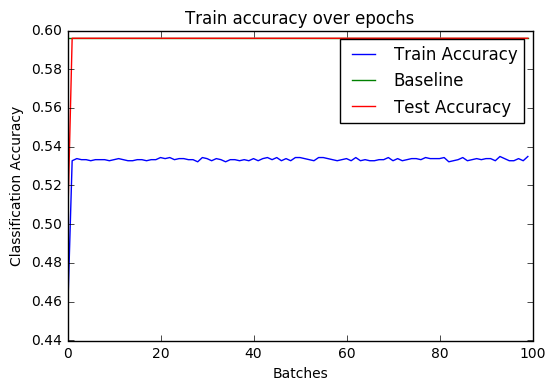

In [110]:
x_val_plt = np.array(range(epochs))

plt.plot(x_val_plt, train_accuracy, label = "Train Accuracy")
plt.plot(x_val_plt, np.ones(epochs) * 0.596, label = "Baseline")
plt.plot(x_val_plt, test_accuracy, label = "Test Accuracy")
plt.title("Train accuracy over epochs")
plt.xlabel("Batches")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

In [117]:
sess.run(accuracy, feed_dict={x: test_bow_original, y_: test_labels_onehot})

0.292

In [158]:
t = np.random.rand(3,3,3)

In [164]:
t[:][2]

array([[ 0.84859733,  0.24674352,  0.62281803],
       [ 0.44222794,  0.68129859,  0.1298091 ],
       [ 0.96506591,  0.65297703,  0.58395024]])